# Simple Scalable Method

In this notebook, I will provide a code to generate scalable response matrix based on subspace reduction

In [1]:
import numpy as np

In [2]:
def HammingD(rowLabel, colLabel):
    HammingD = 0
    rowLabel = str(rowLabel)
    colLabel = str(colLabel)
    
    if len(rowLabel) != len(colLabel):
        return np.nan
        
    for i in range(len(rowLabel)):
        if rowLabel[i] != colLabel[i]:
            HammingD += 1
    return HammingD

In [3]:
def get_basis_state(nqubit):
    if nqubit <= 0:
        print("nqubit should be greater than 0")
        return 0
    
    if nqubit > 1:
        tmp1 = ['0' + i for i in get_basis_state(nqubit-1)]
        tmp2 = ['1' + i for i in get_basis_state(nqubit-1)]
        return tmp1 + tmp2
    if nqubit == 1:
        return ['0', '1']

In [4]:
def HammingMap(nqubit, max_distance = -1):
    basis_state = get_basis_state(nqubit)
    rowLabel = basis_state
    colLabel = basis_state
    
    HammingMap = np.ones((len(rowLabel),len(colLabel))) * 0
    for i in range(len(rowLabel)):
        for j in range(len(colLabel)):
            HammingMap[i][j] = HammingD(rowLabel[i], colLabel[j])
    
    if max_distance == -1:
        return HammingMap
    
    for i in range(0,2**nqubit):
        for j in range(0,2**nqubit):
            if HammingMap[i][j] > max_distance:
                HammingMap[i][j] = 0
            else: 
                HammingMap[i][j] = 1
    
    return HammingMap

In [5]:
def scalable_response(HammingMap, response, nqubit):
    res = HammingMap * response
    # We need to re-normalized for each column. To simplify the calculation, we first get the transpose and then re-normalized by row
    tmp = res.T
    for i in range(2**nqubit):
        tmp[i] = tmp[i]/np.sum(tmp[i]) 
        
    return tmp.T

In [6]:
res1 = np.loadtxt('./result/classical-response.txt')
res2 = np.loadtxt('./result/gamma.txt')

In [7]:
scaA = scalable_response(HammingMap(5, 1), res1, nqubit = 5)
scaG = scalable_response(HammingMap(5, 1), res2, nqubit = 5)

In [8]:
np.savetxt('./result/scalable-A.txt', scaA)
np.savetxt('./result/scalable-gamma.txt', scaG)

<AxesSubplot:>

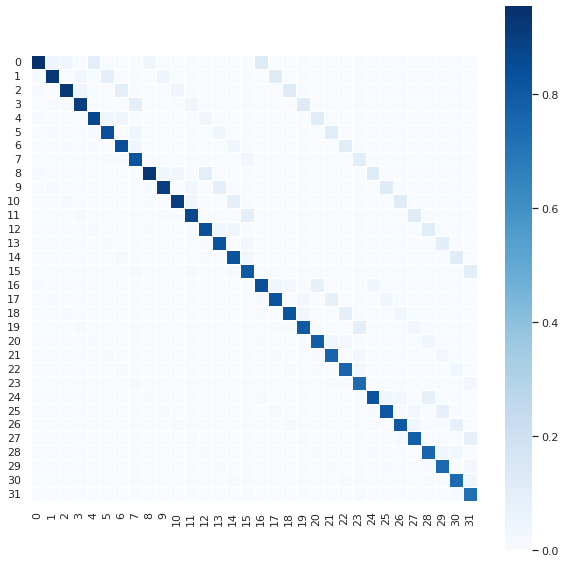

In [9]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(
    scaA,
    cmap=sns.color_palette("Blues", as_cmap=True),
    linewidths=.5,
    square = True
)

<AxesSubplot:>

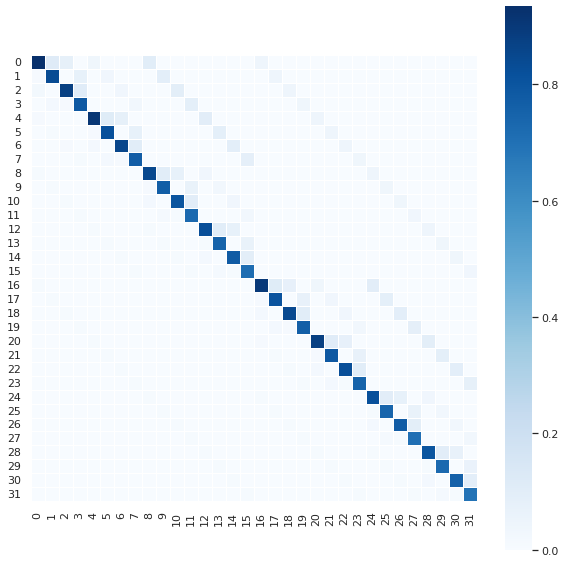

In [10]:
sns.heatmap(
    scaG,
    cmap=sns.color_palette("Blues", as_cmap=True),
    linewidths=.5,
    square = True
)

## Appendix A: Validation of Code

Below I verify whether the Hamming map selection really select the right part of the response matrix. 

<AxesSubplot:>

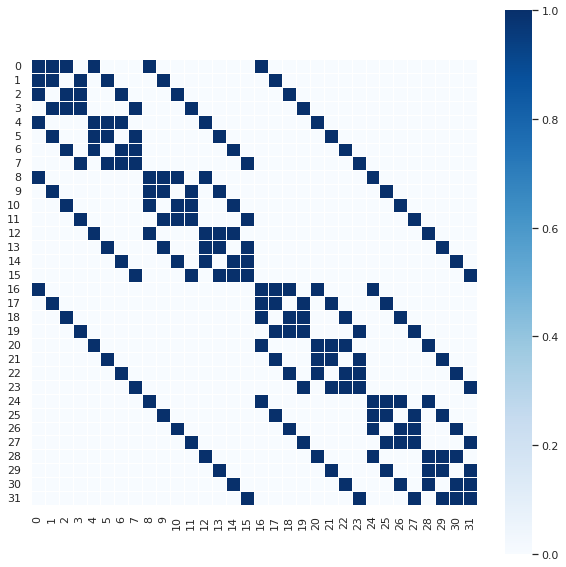

In [11]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(
    HammingMap(5, 1),
    cmap=sns.color_palette("Blues", as_cmap=True),
    linewidths=.5,
    square = True
)

In [12]:
test1 = scalable_response(HammingMap(5, 1), res1, nqubit = 5) == 0
test2 = HammingMap(5, 1) == 0
np.unique(test1 == test2)

array([ True])

In [13]:
# Sum up all element in each column
np.sum(scaA, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Sum up all element in each row
np.sum(scaA, axis = 1)

array([1.29302028, 1.22535919, 1.22974325, 1.16681577, 1.10706933,
       1.03904236, 1.0347474 , 0.97719956, 1.23127367, 1.16501805,
       1.1618381 , 1.09529171, 1.04552101, 0.98480428, 0.98525894,
       0.93519511, 1.04538125, 0.99636238, 0.99288698, 0.94351599,
       0.90295441, 0.83614874, 0.83988309, 0.79013523, 0.99927857,
       0.9459574 , 0.94443987, 0.88852245, 0.84680715, 0.8030004 ,
       0.80070388, 0.74682417])